# Insurance Premium Prediction model using sklearn 
#By- Aarush Kumar
#Dated: September 07,2021

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/home/aarush100616/Downloads/Projects/Insurance Premium Prediction/insurance.csv')

In [3]:
df

age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]

## EDA

In [4]:
df.shape

(1338, 7)

In [5]:
df.size

9366

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [9]:
df.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

## Visualization

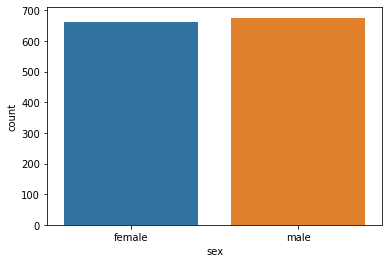

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(1,1,1)
sns.countplot(x='sex',data=df)

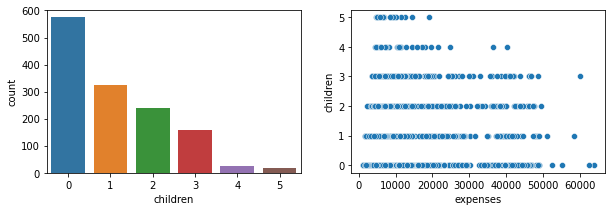

In [13]:
f = plt.figure(figsize=(10,3))
f.add_subplot(121)
sns.countplot(x='children',data=df)
f.add_subplot(122)
sns.scatterplot(data=df, x="expenses", y="children")

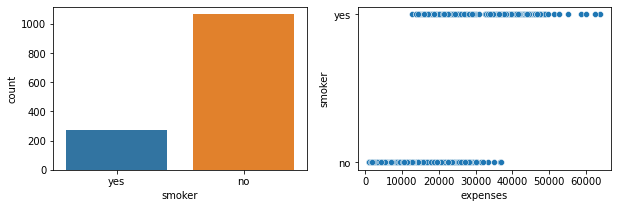

In [14]:
f = plt.figure(figsize=(10,3))
f.add_subplot(121)
sns.countplot(x='smoker',data=df)
f.add_subplot(122)
sns.scatterplot(data=df, x="expenses", y="smoker")

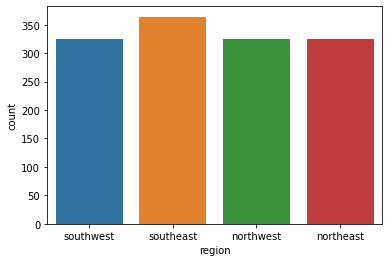

In [15]:
sns.countplot(x='region',data=df)

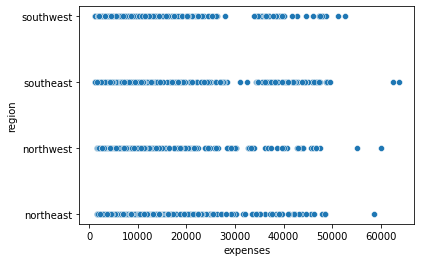

In [16]:
sns.scatterplot(data=df, x="expenses", y="region")

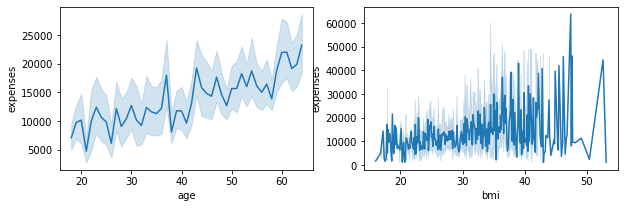

In [17]:
f = plt.figure(figsize=(10,3))
f.add_subplot(121)
sns.lineplot(x='age',y='expenses',data=df)
f.add_subplot(122)
sns.lineplot(x='bmi',y='expenses',data=df)

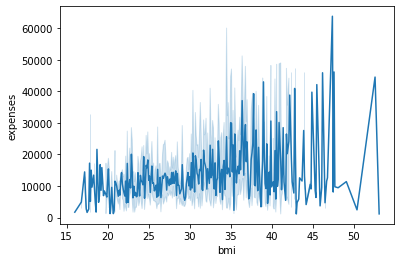

In [18]:
sns.lineplot(x='bmi',y='expenses',data=df)

In [19]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.iloc[:,1] = label.fit_transform(df.iloc[:,1])
df.iloc[:,5] = label.fit_transform(df.iloc[:,5])
df.iloc[:,4] = label.fit_transform(df.iloc[:,4])

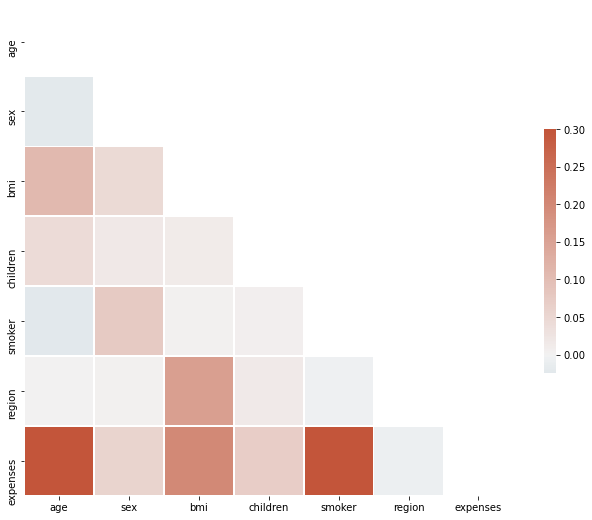

In [20]:
import matplotlib.pyplot as plt
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

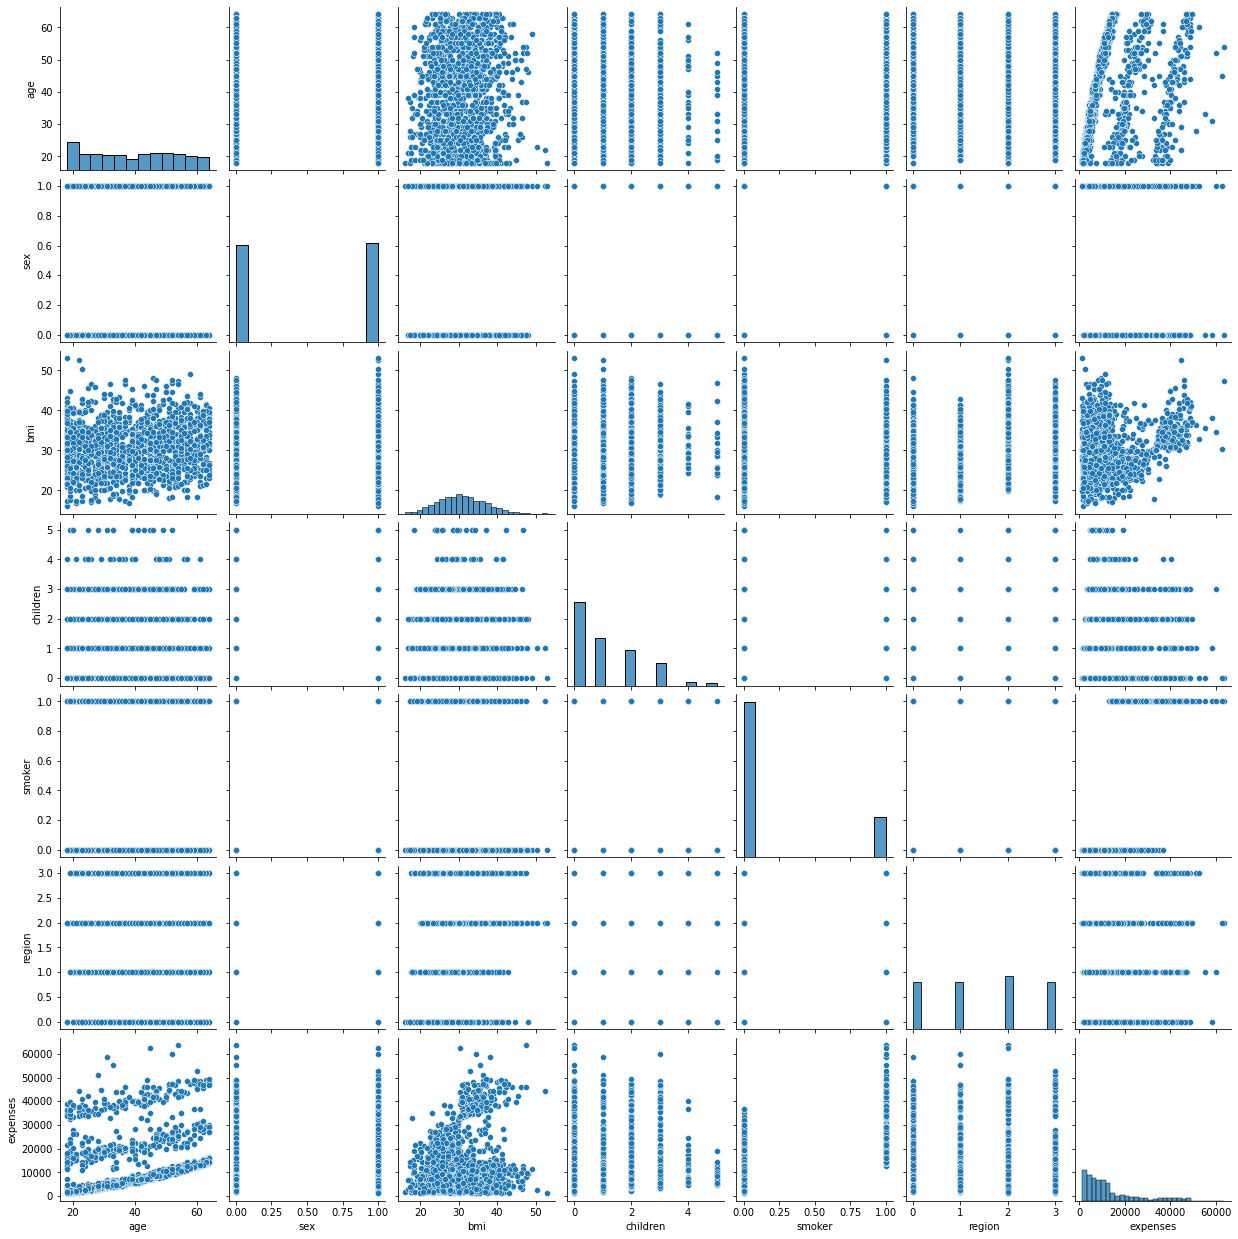

In [21]:
sns.pairplot(df)

In [22]:
X = df[['bmi','age','smoker','children']]
Y = df['expenses']

In [23]:
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.25)

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X_train, y_train, cv=10)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
mse_dt = mean_squared_error(y_test,y_predict,squared=False)
print(mse_dt)

6157.86533583815


In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#cross_val_score(regressor, X_train, y_train, cv=10)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
mse_dt = mean_squared_error(y_test,y_predict,squared=False)
print(mse_dt)

5864.8513350993035


In [26]:
import pickle
pickle.dump(regressor, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

In [27]:
!pip install gradio
import gradio as gr

def greet(bmi,age,smoker,children):
    if smoker:
        is_smoker = 1
    else: 
        is_smoker = 0
    X_test = pd.DataFrame.from_dict({'bmi':[bmi],'age':[age],'smoker':[is_smoker],'children':[children]}) 
    print(X_test)
    y_predict = regressor.predict(X_test)
    print(y_predict)
    return y_predict[0]     

iface = gr.Interface(
  fn=greet, 
  inputs=['text','text','checkbox','text'], 
  outputs="number")
iface.launch(share=True)

     |████████████████████████████████| 3.4MB 676kB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 611kB/s eta 0:00:01     |██████████████▎                 | 860kB 560kB/s eta 0:00:02
     |████████████████████████████████| 215kB 675kB/s eta 0:00:01
     |████████████████████████████████| 962kB 256kB/s eta 0:00:01
     |████████████████████████████████| 71kB 804kB/s eta 0:00:01
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=7aa9eec3ddb41c156cb7c57526e867885c2b2a357306de0454e81976fd22af13
  Stored in directory: /home/aarush100616/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=8da12d061c21db27ee647b428067f3a232fe52f970c62b4afde2ff4a6fa11981
  Stored in directory: /home/aarush100616/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
Successfully built ffmpy flask-cachebuster
Run

(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://10203.gradio.app')

   bmi age  smoker children
0  8.7  21       0        0
[-3856.54643684]
   bmi age  smoker children
0  8.6  28       1        2
[22093.4458157]
